In [1]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

#import tensorflow as tf
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.applications import VGG16
#from tensorflow.keras import layers
#from tensorflow.keras import models
#from tensorflow.keras import regularizers,optimizers
#from keras.models import Sequential
#from tensorflow.keras.layers import Flatten
#from tensorflow.keras.layers import Dropout
#from tensorflow.keras.layers import Dense
#from tensorflow.keras.layers import Input
#from tensorflow.keras.models import Model
#from keras.layers import Conv2D, MaxPooling2D,Activation
#from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.preprocessing.image import img_to_array
#from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import pickle              # For saving models to disk and loading saved models
import os
import zipfile
import PIL
import PIL.Image
import pathlib
import cv2 as cv

In [2]:
# Initializing the random number generator
import random
random.seed(0)

# Ignoring the warnings
import warnings
warnings.filterwarnings("ignore")


In [3]:
path = os.getcwd()
print(path)

C:\Technical\Software\Training\GreatLake\13_CapstoneProject


In [4]:
path += '\\input\\stanford-cars-dataset\\'
os.chdir(path)
print(os.getcwd())

C:\Technical\Software\Training\GreatLake\13_CapstoneProject\input\stanford-cars-dataset


In [5]:
path1 = os.getcwd()
path1

'C:\\Technical\\Software\\Training\\GreatLake\\13_CapstoneProject\\input\\stanford-cars-dataset'

In [6]:
car_img_path = os.path.join(path1,'carImages')
car_ann_path = os.path.join(path1,'Annotations')

car_img_path = os.path.join(path,'carImages\\')
car_ann_path = os.path.join(path,'Annotations\\')

In [7]:
ds_car_name = pd.read_csv("Car names and make.csv",names=['Car Name'])
ds_car_name

,Car Name
0,AM General Hummer SUV 2000
1,Acura RL Sedan 2012
2,Acura TL Sedan 2012
3,Acura TL Type-S 2008
4,Acura TSX Sedan 2012
...,...
191,Volkswagen Beetle Hatchback 2012
192,Volvo C30 Hatchback 2012
193,Volvo 240 Sedan 1993
194,Volvo XC90 SUV 2007


In [8]:
count = 0
car_dict = {}
for car_name in ds_car_name['Car Name'].values:
    car_dict[count+1] = car_name
    count=count+1
car_dict


{1: 'AM General Hummer SUV 2000',
 2: 'Acura RL Sedan 2012',
 3: 'Acura TL Sedan 2012',
 4: 'Acura TL Type-S 2008',
 5: 'Acura TSX Sedan 2012',
 6: 'Acura Integra Type R 2001',
 7: 'Acura ZDX Hatchback 2012',
 8: 'Aston Martin V8 Vantage Convertible 2012',
 9: 'Aston Martin V8 Vantage Coupe 2012',
 10: 'Aston Martin Virage Convertible 2012',
 11: 'Aston Martin Virage Coupe 2012',
 12: 'Audi RS 4 Convertible 2008',
 13: 'Audi A5 Coupe 2012',
 14: 'Audi TTS Coupe 2012',
 15: 'Audi R8 Coupe 2012',
 16: 'Audi V8 Sedan 1994',
 17: 'Audi 100 Sedan 1994',
 18: 'Audi 100 Wagon 1994',
 19: 'Audi TT Hatchback 2011',
 20: 'Audi S6 Sedan 2011',
 21: 'Audi S5 Convertible 2012',
 22: 'Audi S5 Coupe 2012',
 23: 'Audi S4 Sedan 2012',
 24: 'Audi S4 Sedan 2007',
 25: 'Audi TT RS Coupe 2012',
 26: 'BMW ActiveHybrid 5 Sedan 2012',
 27: 'BMW 1 Series Convertible 2012',
 28: 'BMW 1 Series Coupe 2012',
 29: 'BMW 3 Series Sedan 2012',
 30: 'BMW 3 Series Wagon 2012',
 31: 'BMW 6 Series Convertible 2007',
 32: 

train_img_dir = os.path.join(car_img_path,'Train Images')
test_img_dir =  os.path.join(car_img_path,'Test Images')

In [9]:
train_img_dir = os.path.join(car_img_path,'trainImages\\')
test_img_dir =  os.path.join(car_img_path,'testImages\\')

In [10]:
ds_train_ann = pd.read_csv(os.path.join(car_ann_path,'Train Annotations.csv'),names=['Image_Name','Start_x','Start_y','End_x','End_y','Image_class'])
ds_test_ann = pd.read_csv(os.path.join(car_ann_path,'Test Annotation.csv'),names=['Image_Name','Start_x','Start_y','End_x','End_y','Image_class'])

In [11]:
ds_train_ann.drop([ds_train_ann.index[0]],inplace=True)
ds_test_ann.drop([ds_test_ann.index[0]],inplace=True)

In [12]:
ds_train_ann.reset_index(inplace=True,drop=True)
ds_test_ann.reset_index(inplace=True,drop=True)
ds_train_ann.head(5)

,Image_Name,Start_x,Start_y,End_x,End_y,Image_class
0,00001.jpg,39,116.0,569.0,375.0,14
1,00002.jpg,36,116.0,868.0,587.0,3
2,00003.jpg,85,109.0,601.0,381.0,91
3,00004.jpg,621,393.0,1484.0,1096.0,134
4,00005.jpg,14,36.0,133.0,99.0,106


<AxesSubplot:xlabel='Image_class', ylabel='Count'>

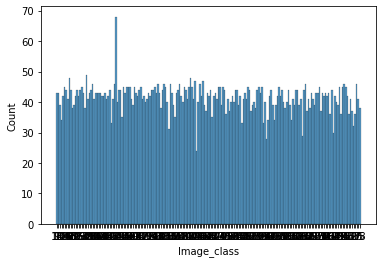

In [13]:
sns.histplot(data=ds_train_ann,x='Image_class',discrete=True)

<AxesSubplot:xlabel='Image_class', ylabel='Count'>

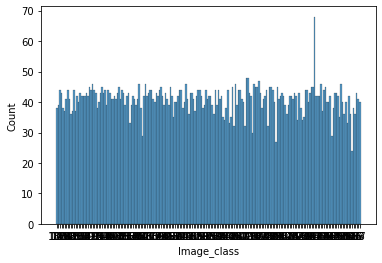

In [14]:
sns.histplot(data=ds_test_ann,x='Image_class',discrete=True)

In [15]:
ds_train_ann[ds_train_ann.duplicated() == True]

,Image_Name,Start_x,Start_y,End_x,End_y,Image_class


In [16]:
def load_images_from_folder(folder):
    #file_name = []
    file_path = {}
    count = 0
    for folders in os.listdir(folder):
        #print(folders)
        if folders == '.DS_Store':
            pass
        else:
            foldername = os.path.join(folder,folders)
            #print(foldername)
            for filename in os.listdir(foldername):
                count = count+1
                filepath = os.path.join(foldername,filename)
                #file_name.append(filename)
                file_path[filename]=filepath
                #print(filename)
    return file_path

In [17]:
train_images_path = load_images_from_folder(train_img_dir)
test_images_path = load_images_from_folder(test_img_dir)
ds_train_ann['Image_Path'] = ds_train_ann['Image_Name'].apply(lambda x:train_images_path[x])
ds_train_ann['Car_Name'] = ds_train_ann['Image_class'].apply(lambda x:car_dict[int(x)])
ds_train_ann['Start_x'] = ds_train_ann.Start_x.astype(float)
ds_train_ann['Image_class'] = ds_train_ann.Image_class.astype(int)
ds_train_ann['Bbox'] = ds_train_ann.apply(lambda x:list([x['Start_x'],x['Start_y'],x['End_x'],x['End_y']]),axis=1)
ds_test_ann['Image_Path'] = ds_test_ann['Image_Name'].apply(lambda x:test_images_path[x])
ds_test_ann['Start_x'] = ds_test_ann.Start_x.astype(float)
ds_test_ann['Image_class'] = ds_test_ann.Image_class.astype(int)
ds_test_ann['Car_Name'] = ds_test_ann['Image_class'].apply(lambda x:car_dict[int(x)])
ds_test_ann['Bbox'] = ds_test_ann.apply(lambda x:list([x['Start_x'],x['Start_y'],x['End_x'],x['End_y']]),axis=1)

In [18]:
ds_train_ann


,Image_Name,Start_x,Start_y,End_x,End_y,Image_class,Image_Path,Car_Name,Bbox
0,00001.jpg,39.0,116.0,569.0,375.0,14,C:\Technical\Software\Training\GreatLake\13_Ca...,Audi TTS Coupe 2012,"[39.0, 116.0, 569.0, 375.0]"
1,00002.jpg,36.0,116.0,868.0,587.0,3,C:\Technical\Software\Training\GreatLake\13_Ca...,Acura TL Sedan 2012,"[36.0, 116.0, 868.0, 587.0]"
2,00003.jpg,85.0,109.0,601.0,381.0,91,C:\Technical\Software\Training\GreatLake\13_Ca...,Dodge Dakota Club Cab 2007,"[85.0, 109.0, 601.0, 381.0]"
3,00004.jpg,621.0,393.0,1484.0,1096.0,134,C:\Technical\Software\Training\GreatLake\13_Ca...,Hyundai Sonata Hybrid Sedan 2012,"[621.0, 393.0, 1484.0, 1096.0]"
4,00005.jpg,14.0,36.0,133.0,99.0,106,C:\Technical\Software\Training\GreatLake\13_Ca...,Ford F-450 Super Duty Crew Cab 2012,"[14.0, 36.0, 133.0, 99.0]"
...,...,...,...,...,...,...,...,...,...
8139,08140.jpg,3.0,44.0,423.0,336.0,78,C:\Technical\Software\Training\GreatLake\13_Ca...,Chrysler Town and Country Minivan 2012,"[3.0, 44.0, 423.0, 336.0]"
8140,08141.jpg,138.0,150.0,706.0,523.0,196,C:\Technical\Software\Training\GreatLake\13_Ca...,smart fortwo Convertible 2012,"[138.0, 150.0, 706.0, 523.0]"
8141,08142.jpg,26.0,246.0,660.0,449.0,163,C:\Technical\Software\Training\GreatLake\13_Ca...,Mercedes-Benz SL-Class Coupe 2009,"[26.0, 246.0, 660.0, 449.0]"
8142,08143.jpg,78.0,526.0,1489.0,908.0,112,C:\Technical\Software\Training\GreatLake\13_Ca...,Ford GT Coupe 2006,"[78.0, 526.0, 1489.0, 908.0]"


In [19]:
def get_image_dims(df,col):
    height = []
    width = []
    for img_path in df[col].values:
        img = cv.imread(img_path)
        height.append(int(img.shape[0]))
        width.append(int(img.shape[1]))
    return height,width

ds_train_ann['Orig_img_height'],ds_train_ann['Orig_img_width'] =  get_image_dims(ds_train_ann,'Image_Path')
ds_test_ann['Orig_img_height'],ds_test_ann['Orig_img_width'] =  get_image_dims(ds_test_ann,'Image_Path')

In [20]:
ds_train_ann

,Image_Name,Start_x,Start_y,End_x,End_y,Image_class,Image_Path,Car_Name,Bbox,Orig_img_height,Orig_img_width
0,00001.jpg,39.0,116.0,569.0,375.0,14,C:\Technical\Software\Training\GreatLake\13_Ca...,Audi TTS Coupe 2012,"[39.0, 116.0, 569.0, 375.0]",400,600
1,00002.jpg,36.0,116.0,868.0,587.0,3,C:\Technical\Software\Training\GreatLake\13_Ca...,Acura TL Sedan 2012,"[36.0, 116.0, 868.0, 587.0]",675,900
2,00003.jpg,85.0,109.0,601.0,381.0,91,C:\Technical\Software\Training\GreatLake\13_Ca...,Dodge Dakota Club Cab 2007,"[85.0, 109.0, 601.0, 381.0]",480,640
3,00004.jpg,621.0,393.0,1484.0,1096.0,134,C:\Technical\Software\Training\GreatLake\13_Ca...,Hyundai Sonata Hybrid Sedan 2012,"[621.0, 393.0, 1484.0, 1096.0]",1386,2100
4,00005.jpg,14.0,36.0,133.0,99.0,106,C:\Technical\Software\Training\GreatLake\13_Ca...,Ford F-450 Super Duty Crew Cab 2012,"[14.0, 36.0, 133.0, 99.0]",108,144
...,...,...,...,...,...,...,...,...,...,...,...
8139,08140.jpg,3.0,44.0,423.0,336.0,78,C:\Technical\Software\Training\GreatLake\13_Ca...,Chrysler Town and Country Minivan 2012,"[3.0, 44.0, 423.0, 336.0]",360,424
8140,08141.jpg,138.0,150.0,706.0,523.0,196,C:\Technical\Software\Training\GreatLake\13_Ca...,smart fortwo Convertible 2012,"[138.0, 150.0, 706.0, 523.0]",600,800
8141,08142.jpg,26.0,246.0,660.0,449.0,163,C:\Technical\Software\Training\GreatLake\13_Ca...,Mercedes-Benz SL-Class Coupe 2009,"[26.0, 246.0, 660.0, 449.0]",469,750
8142,08143.jpg,78.0,526.0,1489.0,908.0,112,C:\Technical\Software\Training\GreatLake\13_Ca...,Ford GT Coupe 2006,"[78.0, 526.0, 1489.0, 908.0]",1067,1600


In [21]:
ds_train_ann.to_csv("train1.csv", index=False)

In [22]:
ds_test_ann.to_csv("test1.csv",index=False)

In [23]:
df_train = pd.read_csv("train1.csv")
df_test = pd.read_csv("test1.csv")

In [24]:
df_train.sample(10)

,Image_Name,Start_x,Start_y,End_x,End_y,Image_class,Image_Path,Car_Name,Bbox,Orig_img_height,Orig_img_width
5412,05413.jpg,177.0,434.0,2613.0,1549.0,23,C:\Technical\Software\Training\GreatLake\13_Ca...,Audi S4 Sedan 2012,"[177.0, 434.0, 2613.0, 1549.0]",1856,2784
2338,02339.jpg,26.0,26.0,268.0,160.0,92,C:\Technical\Software\Training\GreatLake\13_Ca...,Dodge Magnum Wagon 2008,"[26.0, 26.0, 268.0, 160.0]",199,300
4793,04794.jpg,63.0,26.0,436.0,296.0,47,C:\Technical\Software\Training\GreatLake\13_Ca...,Buick Regal GS 2012,"[63.0, 26.0, 436.0, 296.0]",333,500
3159,03160.jpg,17.0,135.0,589.0,439.0,97,C:\Technical\Software\Training\GreatLake\13_Ca...,Dodge Charger SRT-8 2009,"[17.0, 135.0, 589.0, 439.0]",480,640
2627,02628.jpg,27.0,15.0,310.0,222.0,113,C:\Technical\Software\Training\GreatLake\13_Ca...,Ford F-150 Regular Cab 2012,"[27.0, 15.0, 310.0, 222.0]",240,320
8008,08009.jpg,12.0,339.0,1437.0,1073.0,162,C:\Technical\Software\Training\GreatLake\13_Ca...,Mercedes-Benz C-Class Sedan 2012,"[12.0, 339.0, 1437.0, 1073.0]",1080,1440
6465,06466.jpg,16.0,181.0,992.0,531.0,75,C:\Technical\Software\Training\GreatLake\13_Ca...,Chevrolet Silverado 1500 Regular Cab 2012,"[16.0, 181.0, 992.0, 531.0]",768,1024
1972,01973.jpg,16.0,12.0,188.0,115.0,158,C:\Technical\Software\Training\GreatLake\13_Ca...,Maybach Landaulet Convertible 2012,"[16.0, 12.0, 188.0, 115.0]",125,208
7164,07165.jpg,14.0,63.0,419.0,297.0,60,C:\Technical\Software\Training\GreatLake\13_Ca...,Chevrolet HHR SS 2010,"[14.0, 63.0, 419.0, 297.0]",360,424
5583,05584.jpg,18.0,28.0,1442.0,812.0,34,C:\Technical\Software\Training\GreatLake\13_Ca...,BMW M3 Coupe 2012,"[18.0, 28.0, 1442.0, 812.0]",834,1449


In [25]:
#df_train['Img_AR'] = df_train['Orig_img_width']/df_train['Orig_img_height']
#df_train['bb_width'] = df_train['End_x'] - df_train['Start_x']
#df_train['bb_height'] = df_train['End_y'] - df_train['Start_y']
#df_train['bb_AR'] = df_train['bb_width']/df_train['bb_height']

In [26]:
#df_test['Img_AR'] = df_test['Orig_img_width']/df_test['Orig_img_height']
#df_test['bb_width'] = df_test['End_x'] - df_test['Start_x']
#df_test['bb_height'] = df_test['End_y'] - df_test['Start_y']
#df_test['bb_AR'] = df_test['bb_width']/df_test['bb_height']

In [27]:
df_train.sample(5)

,Image_Name,Start_x,Start_y,End_x,End_y,Image_class,Image_Path,Car_Name,Bbox,Orig_img_height,Orig_img_width
4023,04024.jpg,52.0,41.0,377.0,307.0,121,C:\Technical\Software\Training\GreatLake\13_Ca...,GMC Acadia SUV 2012,"[52.0, 41.0, 377.0, 307.0]",360,424
8105,08106.jpg,33.0,73.0,396.0,307.0,151,C:\Technical\Software\Training\GreatLake\13_Ca...,Lamborghini Aventador Coupe 2012,"[33.0, 73.0, 396.0, 307.0]",332,500
2843,02844.jpg,40.0,45.0,438.0,338.0,196,C:\Technical\Software\Training\GreatLake\13_Ca...,smart fortwo Convertible 2012,"[40.0, 45.0, 438.0, 338.0]",360,480
1214,01215.jpg,25.0,124.0,552.0,308.0,114,C:\Technical\Software\Training\GreatLake\13_Ca...,Ford F-150 Regular Cab 2007,"[25.0, 124.0, 552.0, 308.0]",431,575
4535,04536.jpg,111.0,77.0,439.0,332.0,117,C:\Technical\Software\Training\GreatLake\13_Ca...,Ford Fiesta Sedan 2012,"[111.0, 77.0, 439.0, 332.0]",360,480


In [28]:
#df_train['img_area'] = df_train['Orig_img_width']*df_train['Orig_img_height']
#df_train['bb_area'] = df_train['bb_width'] * df_train['bb_height']
#df_test['img_area'] = df_test['Orig_img_width']*df_test['Orig_img_height']
#df_test['bb_area'] = df_test['bb_width'] * df_test['bb_height']

In [29]:
#df_train.sample(5)

In [30]:
cols = list(df_train.columns)
cols

['Image_Name',
 'Start_x',
 'Start_y',
 'End_x',
 'End_y',
 'Image_class',
 'Image_Path',
 'Car_Name',
 'Bbox',
 'Orig_img_height',
 'Orig_img_width']

In [31]:
df_test.columns

Index(['Image_Name', 'Start_x', 'Start_y', 'End_x', 'End_y', 'Image_class',
       'Image_Path', 'Car_Name', 'Bbox', 'Orig_img_height', 'Orig_img_width'],
      dtype='object')

In [32]:
df_test

,Image_Name,Start_x,Start_y,End_x,End_y,Image_class,Image_Path,Car_Name,Bbox,Orig_img_height,Orig_img_width
0,00001.jpg,30.0,52.0,246.0,147.0,181,C:\Technical\Software\Training\GreatLake\13_Ca...,Suzuki Aerio Sedan 2007,"[30.0, 52.0, 246.0, 147.0]",182,276
1,00002.jpg,100.0,19.0,576.0,203.0,103,C:\Technical\Software\Training\GreatLake\13_Ca...,Ferrari 458 Italia Convertible 2012,"[100.0, 19.0, 576.0, 203.0]",360,640
2,00003.jpg,51.0,105.0,968.0,659.0,145,C:\Technical\Software\Training\GreatLake\13_Ca...,Jeep Patriot SUV 2012,"[51.0, 105.0, 968.0, 659.0]",741,1024
3,00004.jpg,67.0,84.0,581.0,407.0,187,C:\Technical\Software\Training\GreatLake\13_Ca...,Toyota Camry Sedan 2012,"[67.0, 84.0, 581.0, 407.0]",480,640
4,00005.jpg,140.0,151.0,593.0,339.0,185,C:\Technical\Software\Training\GreatLake\13_Ca...,Tesla Model S Sedan 2012,"[140.0, 151.0, 593.0, 339.0]",373,600
...,...,...,...,...,...,...,...,...,...,...,...
8036,08037.jpg,49.0,57.0,1169.0,669.0,63,C:\Technical\Software\Training\GreatLake\13_Ca...,Chevrolet Sonic Sedan 2012,"[49.0, 57.0, 1169.0, 669.0]",800,1200
8037,08038.jpg,23.0,18.0,640.0,459.0,16,C:\Technical\Software\Training\GreatLake\13_Ca...,Audi V8 Sedan 1994,"[23.0, 18.0, 640.0, 459.0]",480,640
8038,08039.jpg,33.0,27.0,602.0,252.0,17,C:\Technical\Software\Training\GreatLake\13_Ca...,Audi 100 Sedan 1994,"[33.0, 27.0, 602.0, 252.0]",303,635
8039,08040.jpg,33.0,142.0,521.0,376.0,38,C:\Technical\Software\Training\GreatLake\13_Ca...,BMW Z4 Convertible 2012,"[33.0, 142.0, 521.0, 376.0]",427,640


In [33]:
df_test.sample(5)

,Image_Name,Start_x,Start_y,End_x,End_y,Image_class,Image_Path,Car_Name,Bbox,Orig_img_height,Orig_img_width
127,00128.jpg,122.0,149.0,743.0,455.0,6,C:\Technical\Software\Training\GreatLake\13_Ca...,Acura Integra Type R 2001,"[122.0, 149.0, 743.0, 455.0]",600,900
2787,02788.jpg,48.0,100.0,445.0,298.0,195,C:\Technical\Software\Training\GreatLake\13_Ca...,Volvo XC90 SUV 2007,"[48.0, 100.0, 445.0, 298.0]",350,525
5916,05917.jpg,54.0,119.0,1850.0,1246.0,69,C:\Technical\Software\Training\GreatLake\13_Ca...,Chevrolet Silverado 2500HD Regular Cab 2012,"[54.0, 119.0, 1850.0, 1246.0]",1314,1866
548,00549.jpg,36.0,78.0,999.0,615.0,154,C:\Technical\Software\Training\GreatLake\13_Ca...,Land Rover Range Rover SUV 2012,"[36.0, 78.0, 999.0, 615.0]",768,1024
7321,07322.jpg,9.0,8.0,193.0,110.0,111,C:\Technical\Software\Training\GreatLake\13_Ca...,Ford Ranger SuperCab 2011,"[9.0, 8.0, 193.0, 110.0]",113,200


In [34]:
df_group = df_train.groupby(by=['Image_class']).mean()

In [35]:
df_group

,Start_x,Start_y,End_x,End_y,Orig_img_height,Orig_img_width
Image_class,,,,,,
1,33.355556,67.333333,449.688889,306.000000,338.777778,491.133333
2,69.718750,113.250000,633.250000,380.281250,444.343750,694.250000
3,63.953488,99.046512,657.558140,419.860465,482.976744,714.046512
4,50.380952,131.261905,673.285714,435.357143,505.428571,720.023810
5,47.195122,95.853659,486.926829,313.414634,370.536585,529.878049
...,...,...,...,...,...,...
192,116.395349,163.162791,912.906977,600.930233,699.348837,1021.767442
193,83.833333,113.166667,693.047619,454.404762,517.261905,778.547619
194,84.391304,123.260870,787.304348,485.195652,566.913043,837.391304


In [36]:
df_group.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 1 to 196
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Start_x          196 non-null    float64
 1   Start_y          196 non-null    float64
 2   End_x            196 non-null    float64
 3   End_y            196 non-null    float64
 4   Orig_img_height  196 non-null    float64
 5   Orig_img_width   196 non-null    float64
dtypes: float64(6)
memory usage: 10.7 KB


In [37]:
df_group.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Start_x,196.0,64.969904,28.874050,22.813953,42.609226,57.319580,77.561163,184.659091
Start_y,196.0,108.318143,37.164405,39.025000,83.025877,101.064857,127.836051,260.818182
End_x,196.0,634.928421,172.482091,317.275000,514.339039,609.108935,701.699275,1431.727273
End_y,196.0,414.032831,117.179856,229.000000,333.580952,391.145105,464.607919,989.795455
Orig_img_height,196.0,479.946622,135.123858,252.225000,386.267970,453.641026,529.396959,1140.000000
Orig_img_width,196.0,696.466378,194.958120,349.500000,562.917930,665.098930,771.282998,1579.250000


In [38]:
df_train.head(10)

,Image_Name,Start_x,Start_y,End_x,End_y,Image_class,Image_Path,Car_Name,Bbox,Orig_img_height,Orig_img_width
0,00001.jpg,39.0,116.0,569.0,375.0,14,C:\Technical\Software\Training\GreatLake\13_Ca...,Audi TTS Coupe 2012,"[39.0, 116.0, 569.0, 375.0]",400,600
1,00002.jpg,36.0,116.0,868.0,587.0,3,C:\Technical\Software\Training\GreatLake\13_Ca...,Acura TL Sedan 2012,"[36.0, 116.0, 868.0, 587.0]",675,900
2,00003.jpg,85.0,109.0,601.0,381.0,91,C:\Technical\Software\Training\GreatLake\13_Ca...,Dodge Dakota Club Cab 2007,"[85.0, 109.0, 601.0, 381.0]",480,640
3,00004.jpg,621.0,393.0,1484.0,1096.0,134,C:\Technical\Software\Training\GreatLake\13_Ca...,Hyundai Sonata Hybrid Sedan 2012,"[621.0, 393.0, 1484.0, 1096.0]",1386,2100
4,00005.jpg,14.0,36.0,133.0,99.0,106,C:\Technical\Software\Training\GreatLake\13_Ca...,Ford F-450 Super Duty Crew Cab 2012,"[14.0, 36.0, 133.0, 99.0]",108,144
5,00006.jpg,259.0,289.0,515.0,416.0,123,C:\Technical\Software\Training\GreatLake\13_Ca...,Geo Metro Convertible 1993,"[259.0, 289.0, 515.0, 416.0]",431,575
6,00007.jpg,88.0,80.0,541.0,397.0,89,C:\Technical\Software\Training\GreatLake\13_Ca...,Dodge Journey SUV 2012,"[88.0, 80.0, 541.0, 397.0]",480,640
7,00008.jpg,73.0,79.0,591.0,410.0,96,C:\Technical\Software\Training\GreatLake\13_Ca...,Dodge Charger Sedan 2012,"[73.0, 79.0, 591.0, 410.0]",480,639
8,00009.jpg,20.0,126.0,1269.0,771.0,167,C:\Technical\Software\Training\GreatLake\13_Ca...,Mitsubishi Lancer Sedan 2012,"[20.0, 126.0, 1269.0, 771.0]",843,1280
9,00010.jpg,21.0,110.0,623.0,367.0,58,C:\Technical\Software\Training\GreatLake\13_Ca...,Chevrolet Traverse SUV 2012,"[21.0, 110.0, 623.0, 367.0]",480,640


In [39]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Start_x,8144.0,64.906803,82.198684,1.0,19.0,39.0,79.00,1648.0
Start_y,8144.0,108.661223,104.551635,1.0,42.0,80.0,138.25,1508.0
End_x,8144.0,638.208620,410.776734,76.0,392.0,569.0,746.25,5205.0
End_y,8144.0,416.431606,273.786000,47.0,248.0,360.0,477.00,3389.0
Image_class,8144.0,98.979371,56.503148,1.0,50.0,99.0,148.00,196.0
Orig_img_height,8144.0,482.771979,317.580021,57.0,290.0,424.0,540.00,3744.0
Orig_img_width,8144.0,699.793099,450.922445,78.0,429.0,636.5,800.00,5616.0


In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8144 entries, 0 to 8143
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Image_Name       8144 non-null   object 
 1   Start_x          8144 non-null   float64
 2   Start_y          8144 non-null   float64
 3   End_x            8144 non-null   float64
 4   End_y            8144 non-null   float64
 5   Image_class      8144 non-null   int64  
 6   Image_Path       8144 non-null   object 
 7   Car_Name         8144 non-null   object 
 8   Bbox             8144 non-null   object 
 9   Orig_img_height  8144 non-null   int64  
 10  Orig_img_width   8144 non-null   int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 700.0+ KB


In [41]:
df_train[df_train['Orig_img_height'].isna()]

,Image_Name,Start_x,Start_y,End_x,End_y,Image_class,Image_Path,Car_Name,Bbox,Orig_img_height,Orig_img_width


In [42]:
def read_image(path):
    im = cv.imread(str(path))
    return cv.cvtColor(im, cv.COLOR_BGR2RGB)

#image_paths = list(df_train['Image_Path']) 
#images = [read_image(p) for p in image_paths]

In [43]:
#df_train['Images'] = images

In [44]:
#df_train.to_csv("train1.csv", index=False)

In [45]:
#image_paths = list(df_test['Image_Path']) 
#images = [read_image(p) for p in image_paths]

In [46]:
#df_test['Images'] = images

In [47]:
#df_test.to_csv("test1.csv", index=False)

In [48]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, x_max, y_max = map(int,bbox)
    cv.rectangle(img, (x_min, y_min), (x_max, y_max), color=BOX_COLOR, thickness=thickness)
    
    ((text_width, text_height), _) = cv.getTextSize(class_name, cv.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv.rectangle(img, (x_min, (y_min - int(0.3 * text_height))), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv.LINE_AA,
    )
    return img


def visualize(image_list, bbox_list, class_list):
    count = 0
    image_final = []
    for images in image_list:
        #print(img)
        bbox = bbox_list[count]
        #print(bbox)
        class_name = class_list[count]
        #print(class_name)
        img = visualize_bbox(images, bbox, class_name)
        image_final.append(img)
        count = count + 1
    return image_final

In [49]:
df_train['Bbox'] = df_train.apply(lambda x:list([x['Start_x'],x['Start_y'],x['End_x'],x['End_y']]),axis=1)
df_train

,Image_Name,Start_x,Start_y,End_x,End_y,Image_class,Image_Path,Car_Name,Bbox,Orig_img_height,Orig_img_width
0,00001.jpg,39.0,116.0,569.0,375.0,14,C:\Technical\Software\Training\GreatLake\13_Ca...,Audi TTS Coupe 2012,"[39.0, 116.0, 569.0, 375.0]",400,600
1,00002.jpg,36.0,116.0,868.0,587.0,3,C:\Technical\Software\Training\GreatLake\13_Ca...,Acura TL Sedan 2012,"[36.0, 116.0, 868.0, 587.0]",675,900
2,00003.jpg,85.0,109.0,601.0,381.0,91,C:\Technical\Software\Training\GreatLake\13_Ca...,Dodge Dakota Club Cab 2007,"[85.0, 109.0, 601.0, 381.0]",480,640
3,00004.jpg,621.0,393.0,1484.0,1096.0,134,C:\Technical\Software\Training\GreatLake\13_Ca...,Hyundai Sonata Hybrid Sedan 2012,"[621.0, 393.0, 1484.0, 1096.0]",1386,2100
4,00005.jpg,14.0,36.0,133.0,99.0,106,C:\Technical\Software\Training\GreatLake\13_Ca...,Ford F-450 Super Duty Crew Cab 2012,"[14.0, 36.0, 133.0, 99.0]",108,144
...,...,...,...,...,...,...,...,...,...,...,...
8139,08140.jpg,3.0,44.0,423.0,336.0,78,C:\Technical\Software\Training\GreatLake\13_Ca...,Chrysler Town and Country Minivan 2012,"[3.0, 44.0, 423.0, 336.0]",360,424
8140,08141.jpg,138.0,150.0,706.0,523.0,196,C:\Technical\Software\Training\GreatLake\13_Ca...,smart fortwo Convertible 2012,"[138.0, 150.0, 706.0, 523.0]",600,800
8141,08142.jpg,26.0,246.0,660.0,449.0,163,C:\Technical\Software\Training\GreatLake\13_Ca...,Mercedes-Benz SL-Class Coupe 2009,"[26.0, 246.0, 660.0, 449.0]",469,750
8142,08143.jpg,78.0,526.0,1489.0,908.0,112,C:\Technical\Software\Training\GreatLake\13_Ca...,Ford GT Coupe 2006,"[78.0, 526.0, 1489.0, 908.0]",1067,1600


In [50]:
df_test['Bbox'] = df_test.apply(lambda x:list([x['Start_x'],x['Start_y'],x['End_x'],x['End_y']]),axis=1)
df_test

,Image_Name,Start_x,Start_y,End_x,End_y,Image_class,Image_Path,Car_Name,Bbox,Orig_img_height,Orig_img_width
0,00001.jpg,30.0,52.0,246.0,147.0,181,C:\Technical\Software\Training\GreatLake\13_Ca...,Suzuki Aerio Sedan 2007,"[30.0, 52.0, 246.0, 147.0]",182,276
1,00002.jpg,100.0,19.0,576.0,203.0,103,C:\Technical\Software\Training\GreatLake\13_Ca...,Ferrari 458 Italia Convertible 2012,"[100.0, 19.0, 576.0, 203.0]",360,640
2,00003.jpg,51.0,105.0,968.0,659.0,145,C:\Technical\Software\Training\GreatLake\13_Ca...,Jeep Patriot SUV 2012,"[51.0, 105.0, 968.0, 659.0]",741,1024
3,00004.jpg,67.0,84.0,581.0,407.0,187,C:\Technical\Software\Training\GreatLake\13_Ca...,Toyota Camry Sedan 2012,"[67.0, 84.0, 581.0, 407.0]",480,640
4,00005.jpg,140.0,151.0,593.0,339.0,185,C:\Technical\Software\Training\GreatLake\13_Ca...,Tesla Model S Sedan 2012,"[140.0, 151.0, 593.0, 339.0]",373,600
...,...,...,...,...,...,...,...,...,...,...,...
8036,08037.jpg,49.0,57.0,1169.0,669.0,63,C:\Technical\Software\Training\GreatLake\13_Ca...,Chevrolet Sonic Sedan 2012,"[49.0, 57.0, 1169.0, 669.0]",800,1200
8037,08038.jpg,23.0,18.0,640.0,459.0,16,C:\Technical\Software\Training\GreatLake\13_Ca...,Audi V8 Sedan 1994,"[23.0, 18.0, 640.0, 459.0]",480,640
8038,08039.jpg,33.0,27.0,602.0,252.0,17,C:\Technical\Software\Training\GreatLake\13_Ca...,Audi 100 Sedan 1994,"[33.0, 27.0, 602.0, 252.0]",303,635
8039,08040.jpg,33.0,142.0,521.0,376.0,38,C:\Technical\Software\Training\GreatLake\13_Ca...,BMW Z4 Convertible 2012,"[33.0, 142.0, 521.0, 376.0]",427,640


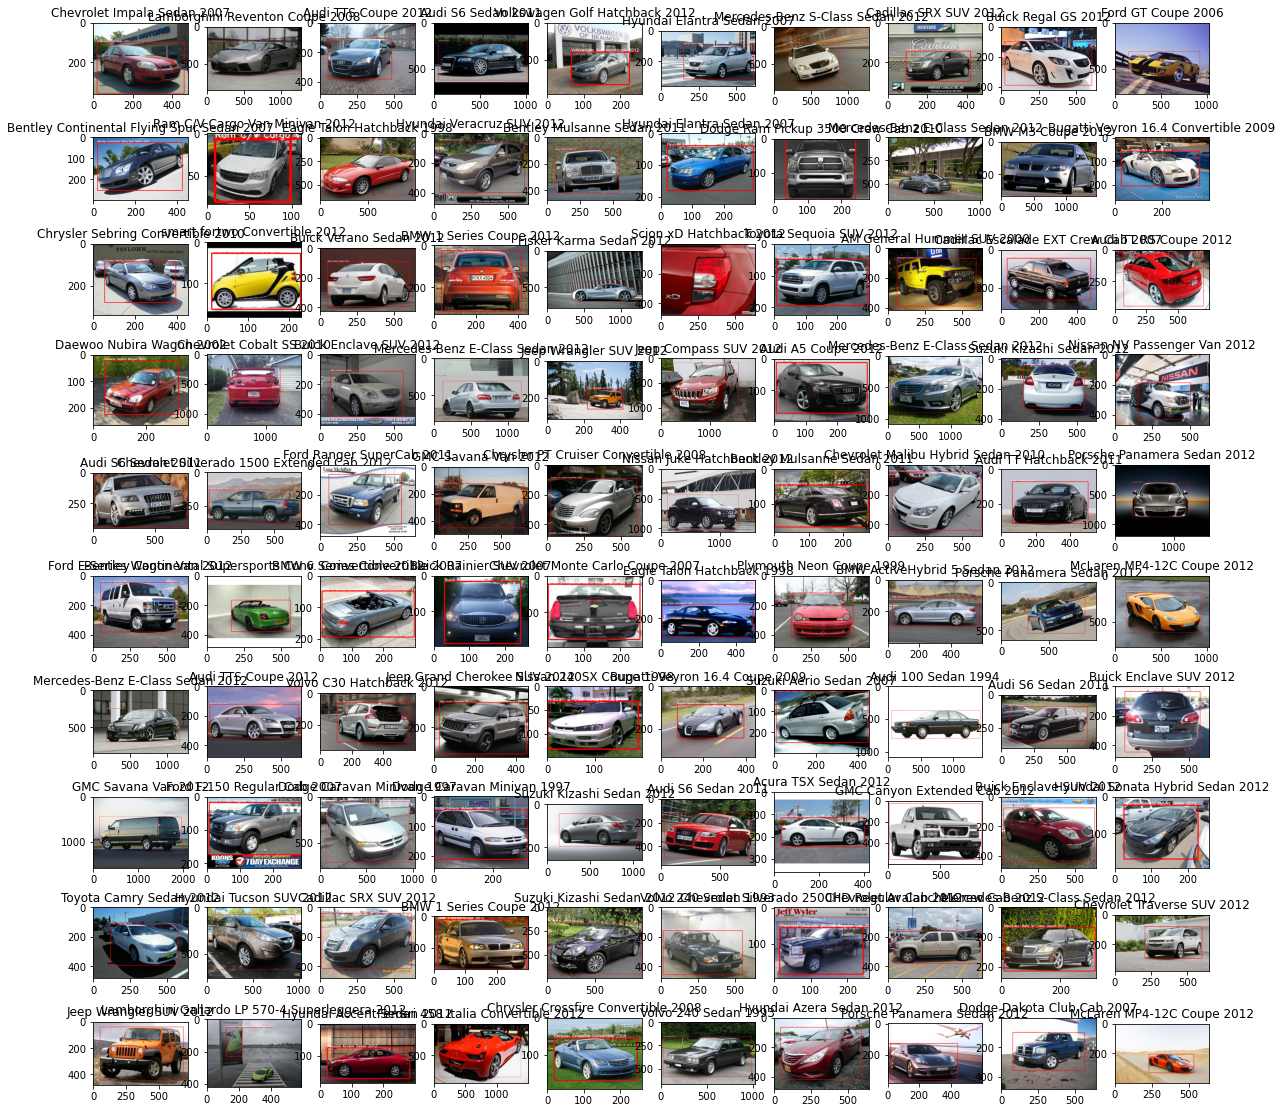

In [51]:
df_visualize = df_train.sample(100)
image_paths = list(df_visualize['Image_Path']) 
images = [read_image(p) for p in image_paths]
#images = np.array(df_visualize['Images'])
image_name = list(df_visualize['Car_Name'])
bbox_list = list(df_visualize['Bbox'])
image = visualize(images,bbox_list,image_name)
fig = plt.figure(figsize=(20, 20))
columns = 10
rows = 10

pics = []
for i in range(columns*rows):
    pics.append(fig.add_subplot(rows, columns, i+1,title=image_name[i]))
    plt.imshow(image[i])

plt.show() 

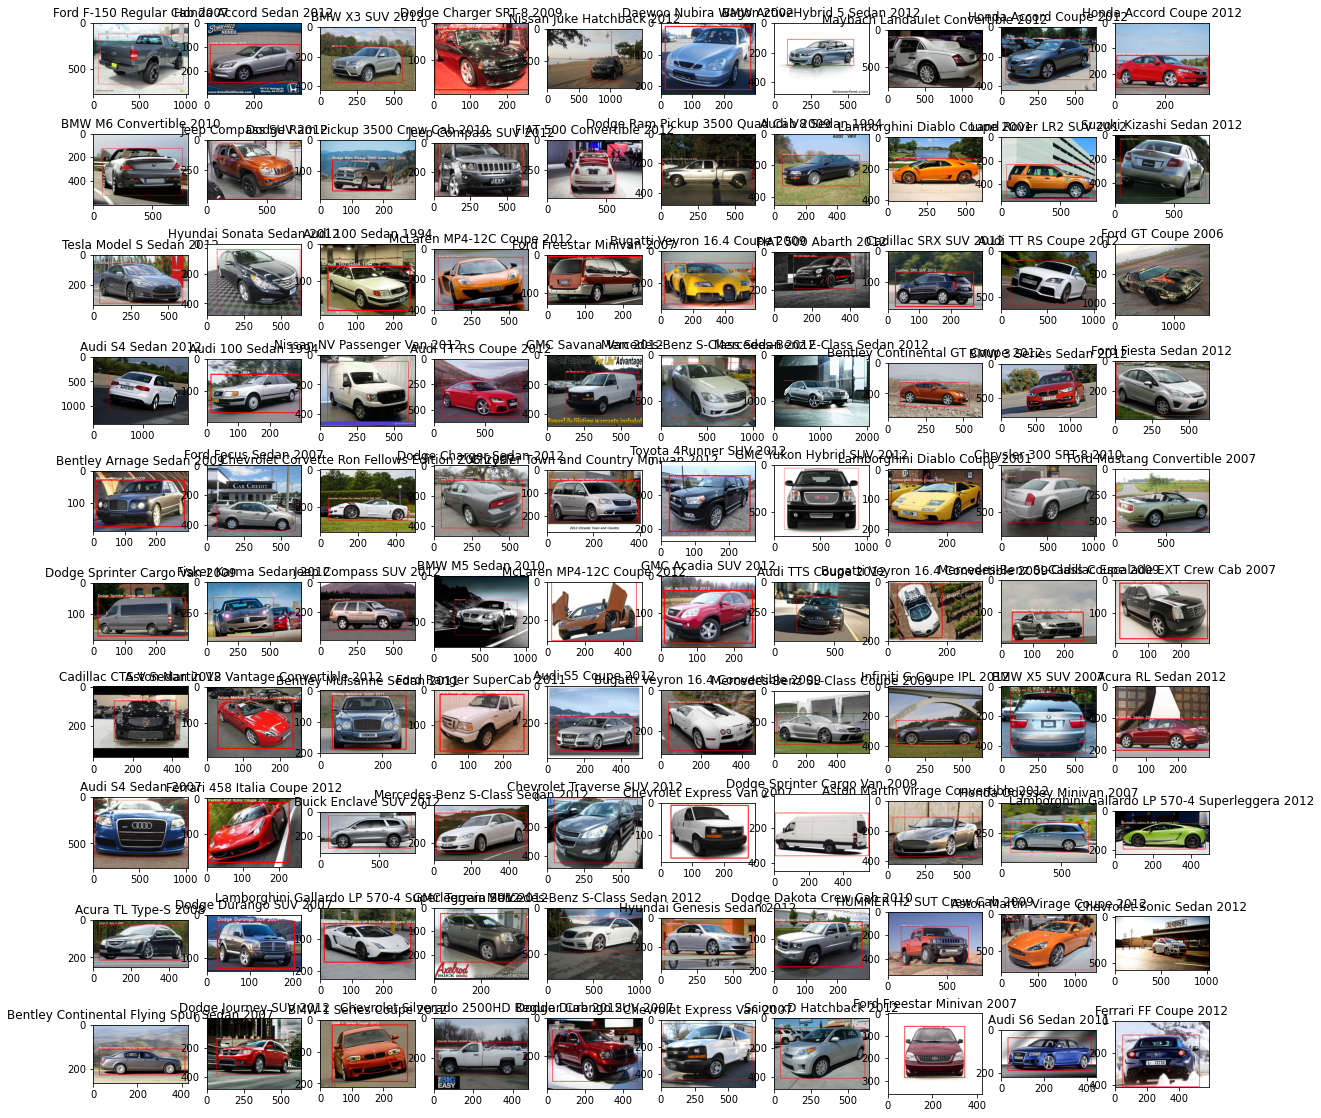

In [52]:
df_test_visualize = df_test.sample(100)
image_paths = list(df_test_visualize['Image_Path']) 
images = [read_image(p) for p in image_paths]
#images = np.array(df_visualize['Images'])
image_name = list(df_test_visualize['Car_Name'])
bbox_list = list(df_test_visualize['Bbox'])
image = visualize(images,bbox_list,image_name)
fig = plt.figure(figsize=(20, 20))
columns = 10
rows = 10

pics = []
for i in range(columns*rows):
    pics.append(fig.add_subplot(rows, columns, i+1,title=image_name[i]))
    plt.imshow(image[i])

plt.show() 

In [53]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Start_x,8144.0,64.906803,82.198684,1.0,19.0,39.0,79.00,1648.0
Start_y,8144.0,108.661223,104.551635,1.0,42.0,80.0,138.25,1508.0
End_x,8144.0,638.208620,410.776734,76.0,392.0,569.0,746.25,5205.0
End_y,8144.0,416.431606,273.786000,47.0,248.0,360.0,477.00,3389.0
Image_class,8144.0,98.979371,56.503148,1.0,50.0,99.0,148.00,196.0
Orig_img_height,8144.0,482.771979,317.580021,57.0,290.0,424.0,540.00,3744.0
Orig_img_width,8144.0,699.793099,450.922445,78.0,429.0,636.5,800.00,5616.0


In [54]:
df_train['bb_area/img_area'] = df_train['bb_area']/df_train['img_area']
df_train.head(5)

KeyError: 'bb_area'

In [ ]:
cols = list(df_train.columns)
cols

In [ ]:
df_eda = df_train[['Image_Name','Image_class','Bbox','Orig_img_width','Orig_img_height','Img_AR','bb_width','bb_height','bb_AR',
                  'img_area','bb_area','bb_area/img_area']]

In [ ]:
df_eda.sample(10)

In [ ]:
sns.histplot(data=df_eda,x='Img_AR',binwidth=0.1)

In [ ]:
np.mean(np.array(df_eda['Img_AR']))

In [ ]:
sns.histplot(data=df_eda,x='bb_AR',binwidth=0.2)

In [ ]:
df_group.sample(5)

In [ ]:
#df_group.reset_index(inplace=True)
df_group

In [ ]:
df_group['Car_Name'] = df_group['Image_class'].apply(lambda x:car_dict[int(x)])

In [ ]:
sns.barplot(data=df_group,x='Image_class',y='bb_area')

# Create the model

In [ ]:
IMAGE_SIZE = 128

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Reshape

ALPHA = 1.0 # Width hyper parameter for MobileNet (0.25, 0.5, 0.75, 1.0). Higher width means more accurate but slower

def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, alpha=ALPHA,weights='imagenet') # Load pre-trained mobilenet
    # Do not include classification (top) layer

    # to freeze layers, except the new top layer, of course, which will be added below
    for layer in model.layers:
        layer.trainable = trainable

    x = model.layers[-1].output        
        
    return Model(inputs=model.input,  outputs=x)

In [ ]:
base_model = create_model(True) # Arg is False, if you want to freeze lower layers for fast training (but low accuracy)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
pred = Dense(196, activation='softmax')(x)

#model = Model(inputs# = base_model.input, outputs=base_model.layers[-1].output)

In [ ]:
model = Model(inputs = base_model.input,outputs=pred)

In [ ]:
model.summary() # Print summary

In [ ]:
def IOU(y_true, y_pred):
    intersections = 0
    unions = 0
    # set the types so we are sure what type we are using

    gt = y_true
    pred = y_pred

    print("y_true",y_true)
    print("y_pred",y_pred)
    # Compute interection of predicted (pred) and ground truth (gt) bounding boxes
    diff_width = np.minimum(gt[:,0] + gt[:,2], pred[:,0] + pred[:,2]) - np.maximum(gt[:,0], pred[:,0])
    diff_height = np.minimum(gt[:,1] + gt[:,3], pred[:,1] + pred[:,3]) - np.maximum(gt[:,1], pred[:,1])
    intersection = diff_width * diff_height

    # Compute union
    area_gt = gt[:,2] * gt[:,3]
    area_pred = pred[:,2] * pred[:,3]
    union = area_gt + area_pred - intersection

    # Compute intersection and union over multiple boxes
    for j, _ in enumerate(union):
      if union[j] > 0 and intersection[j] > 0 and union[j] >= intersection[j]:
        intersections += intersection[j]
        unions += union[j]

    # Compute IOU. Use epsilon to prevent division by zero
    iou = np.round(intersections / (unions + tensorflow.keras.backend.epsilon()), 4)
    # This must match the type used in py_func
    iou = iou.astype(np.float32)
    return iou

In [ ]:
def IoU(y_true, y_pred):
    iou = tensorflow.py_function(IOU, [y_true, y_pred], Tout=tensorflow.float32)
    return iou

# Compile the model
loss: "categorical_crossentropy"
metrics: IoU
optimizer: "adam"

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the model

In [ ]:
import tensorflow

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

print("STEP_SIZE_TRAIN",STEP_SIZE_TRAIN)
print("STEP_SIZE_VALID",STEP_SIZE_VALID)
print("STEP_SIZE_TEST",STEP_SIZE_TEST)

In [ ]:
epochs = 2
steps_per_epoch = 5

In [ ]:
history = model.fit_generator(train_generator,
                              steps_per_epoch = steps_per_epoch,
                              epochs=epochs,
                              workers=1,
                              validation_data=valid_generator,
                              validation_steps=STEP_SIZE_VALID)

# Visualizing the training and Validation performance

In [ ]:
print(history.history)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()